# Level 2 – Task 2: Price Range Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset data science.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Step 1: Determine Most Common Price Range

Price Range Counts:
 Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


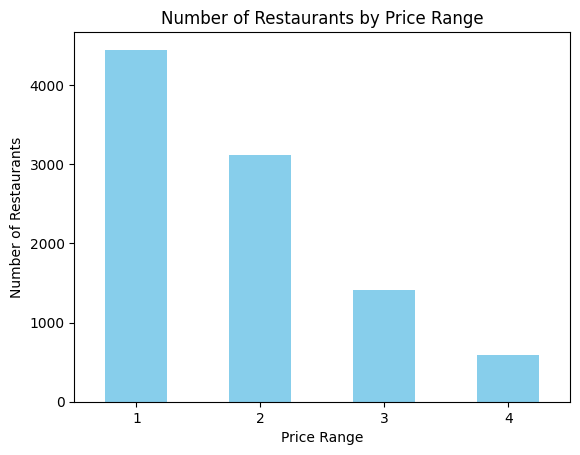

In [3]:
price_counts = df['Price range'].value_counts().sort_index()

print("Price Range Counts:\n", price_counts)

# Bar plot
price_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Restaurants by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.show()


## Step 2: Average Aggregate Rating for Each Price Range

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


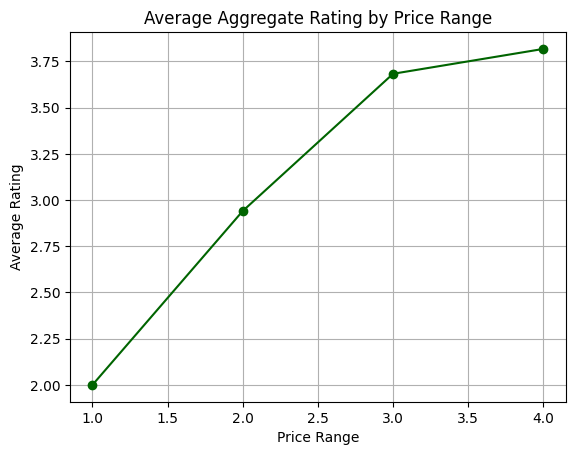

In [4]:
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
print(avg_rating_by_price)

# Line plot
avg_rating_by_price.plot(kind='line', marker='o', color='darkgreen')
plt.title("Average Aggregate Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

## Step 3: Identify Color Representing Highest Rating

In [5]:
# Assuming dataset has a column "Rating color"
avg_rating_color = df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()

# Find the top rating color per price range
top_color = avg_rating_color.sort_values('Aggregate rating', ascending=False).drop_duplicates('Price range')

print("Top Rating Color by Price Range:\n", top_color)


Top Rating Color by Price Range:
     Price range Rating color  Aggregate rating
18            4   Dark Green          4.709459
0             1   Dark Green          4.668750
12            3   Dark Green          4.646032
6             2   Dark Green          4.627536


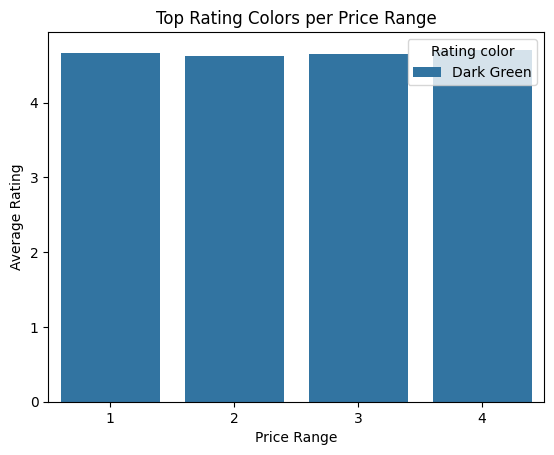

In [6]:
sns.barplot(data=top_color, x='Price range', y='Aggregate rating', hue='Rating color')
plt.title("Top Rating Colors per Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()
